# I. Utilities

## External Libraries

In [1]:
!pip install seedir
!pip install emojiY
!pip uninstall joblib
!pip install joblib==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 111.2/111.2 KB 2.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement emojiY (from versions: none)
ERROR: No matching distribution found for emojiY
Found existing installation: joblib 1.1.1
Uninstalling joblib-1.1.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/joblib-1.1.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/joblib/*
Proceed (Y/n)? Y
  Successfully uninstalled joblib-1.1.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 298.0/298.0 KB 6.1

### Mounting storage space(drive or local disk)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PY4BD/Rice/
#%cd /mnt/d_drive/Rice/data

Mounted at /content/drive
/content/drive/MyDrive/PY4BD/Rice


## Libraries

In [3]:
import os,\
        seedir
os.environ['RICEDATA']='/content/drive/MyDrive/PY4BD/Rice/data/output/2023-03-28'

from Rice import *



#images and plots
import matplotlib.pyplot as plt
import plotly.express as px,seaborn

# II.Species Data Exploration

In [ ]:
!ls

archive.zip


## Statistics

### 5 species

In [ ]:
print(f'Nb Species : {len(MyRiceImgReader.all_species)} ','*'*14,'( Name , index)','\n'.join(str(s) for s in MyRiceImgReader.all_species.items()),sep='\n')


Nb Species : 5 
**************
( Name , index)
('Karacadag', 0)
('Jasmine', 1)
('Ipsala', 2)
('Arborio', 3)
('Basmati', 4)


### 15k images per species

In [ ]:
{spc : len(MyRiceImgReader(spc)) for spc in MyRiceImgReader.all_species}

{'Karacadag': 15000,
 'Jasmine': 15000,
 'Ipsala': 15000,
 'Arborio': 15000,
 'Basmati': 15000}

### Large matrixes from png files 250x250x3 pixels

In [ ]:
{spc : [*MyRiceImgReader(spc,max_imgs=1).images_arrays({})][0].shape for spc in MyRiceImgReader.all_species}

Karacadag:   0%|          | 0/1 [00:00<?, ?it/s]

Jasmine:   0%|          | 0/1 [00:00<?, ?it/s]

Ipsala:   0%|          | 0/1 [00:00<?, ?it/s]

Arborio:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

{'Karacadag': (250, 250, 3),
 'Jasmine': (250, 250, 3),
 'Ipsala': (250, 250, 3),
 'Arborio': (250, 250, 3),
 'Basmati': (250, 250, 3)}

In [ ]:
250*250*3

187500

## Previewing images

### Arborio

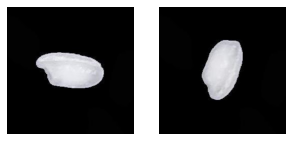

In [ ]:
MyRiceImgReader('Arborio').plot((1,2),figsize=(5,5))

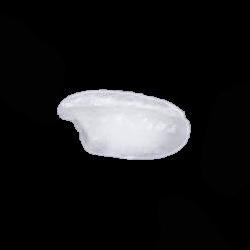

In [ ]:
MyRiceImgReader('Arborio')[0]

### Karacadag

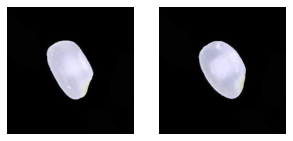

In [ ]:
MyRiceImgReader('Karacadag').plot((1,2),figsize=(5,5))

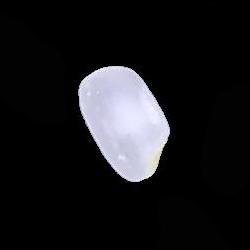

In [ ]:
MyRiceImgReader('Karacadag')[0]

### Ipsala

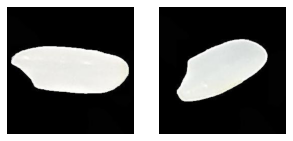

In [ ]:
MyRiceImgReader('Ipsala').plot((1,2),figsize=(5,5))

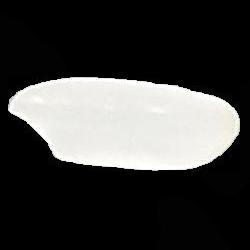

In [ ]:
MyRiceImgReader('Ipsala')[0]

### Jasmine

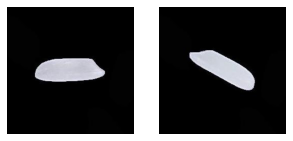

In [ ]:
MyRiceImgReader('Jasmine').plot((1,2),figsize=(5,5))

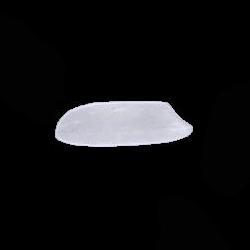

In [ ]:
MyRiceImgReader('Jasmine')[1000]

### Basmati

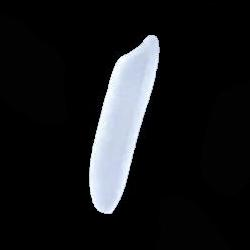

In [ ]:
MyRiceImgReader('Basmati')[0]

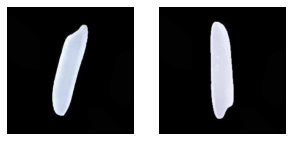

In [ ]:
MyRiceImgReader('Basmati').plot((1,2),figsize=(5,5))

## All Species( polished rice)

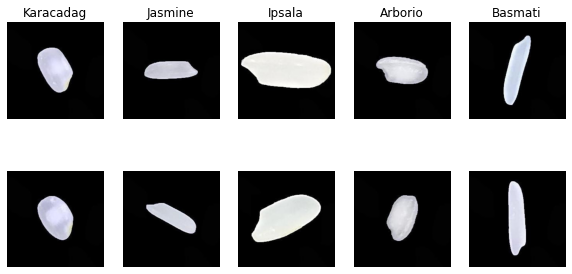

In [ ]:
images = {spc:[MyRiceImgReader(spc)[i] for i in range(2)] for spc in MyRiceImgReader.all_species}
fig,axes = plt.subplots(2,5)
fig.set_size_inches(10,5)
for i,spc in enumerate(images):
  for j,im in enumerate(images[spc]):
    axes[j][i].imshow(im)
    axes[j][i].axes.axis('off')
    if j == 0:
      axes[j][i].axes.set_title(spc)

# IV. Images Preview Modes

In [ ]:
previews = [
    
    {},#normal
    {'max_dim':7},#projected by principal components analysis to 250*7 array
    {'enlarge_backgrd':10}, #zoomed up by x10 and randomly positionned in frame
    {'max_dim':7,'enlarge_backgrd':10},
    {'max_dim':7,'enlarge_backgrd':10,'initsize':True}, #reverts to initial size after transformation
    {'enlarge_backgrd':10,'initsize':True,'pile_size':10}
]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

Basmati:   0%|          | 0/1 [00:00<?, ?it/s]

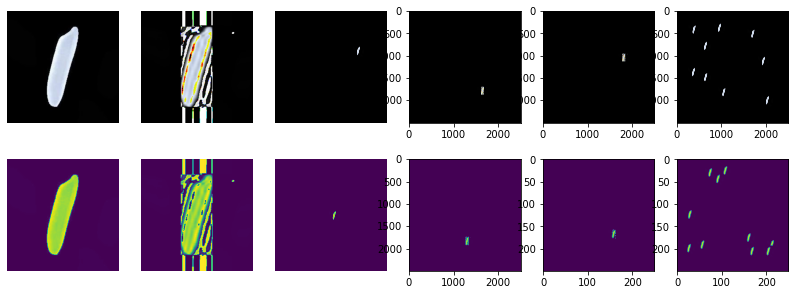

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=6)
fig.set_size_inches(14,5)
for i in range(2):
  gs = [False,True][i]
  for j in range(len(previews)):
    p = previews[j]
    im = [*MyRiceImgReader('Basmati',max_imgs=1,gs=gs).images_arrays(p)][0]
    ax = axes[i][j]
    if j<3:ax.axis('off')
    ax.imshow(im.astype('uint8'))

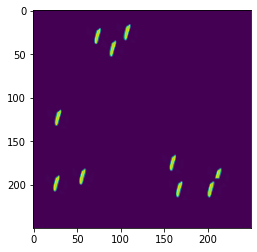

In [ ]:
plt.imshow(im.astype('uint8'))

# V. Saving fit data

## Storing PCA transformers

### Gray normal preview

In [ ]:
GrayFitData  = FitData('gray',gs = True,output = 'output/2023-03-28')
n_components = 10

In [ ]:
GrayFitData.dump_transformers(n_components,
                              n_ims_sample=10)

Karacadag:   0%|          | 0/15000 [00:00<?, ?it/s]

Jasmine:   0%|          | 0/15000 [00:00<?, ?it/s]

Ipsala:   0%|          | 0/15000 [00:00<?, ?it/s]

Arborio:   0%|          | 0/15000 [00:00<?, ?it/s]

Basmati:   0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
!ls output/2023-03-28

inverters


In [ ]:
!ls output/2023-03-28/inverters

gray  gray_enlarged


#### kept information with 10 components

Karacadag   Jasmine    Ipsala   Arborio   Basmati
PC_8   0.997464  0.991084  0.992752  0.996324  0.987913
PC_9   0.997828  0.992065  0.993604  0.996719  0.989537

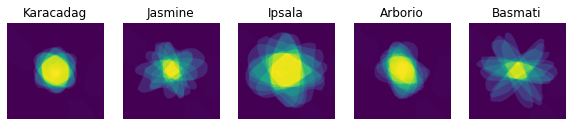

In [ ]:
### Mean images used
fig,axes = plt.subplots(1,5)
fig.set_size_inches(10,10)
for i,spc in enumerate(GrayFitData.ims):
    axes[i].imshow(GrayFitData.ims[spc])
    axes[i].axes.axis('off')
    axes[i].axes.set_title(spc)
pandas.DataFrame({
    spc: pca.explained_variance_ratio_.cumsum()

    for spc,pca in GrayFitData.pcas.items()
}).rename('PC_{}'.format).tail(2)

In [ ]:
!ls output/2023-03-28/inverters

### Same for Enlarged brackgound with random position

In [ ]:
GrayEnlargedFitData = FitData('gray_enlarged',
                              gs     = True,
                             output  = GrayFitData.output,
                             preview = {'enlarge_backgrd':10,'initsize':True}
                             )

In [ ]:

GrayEnlargedFitData.dump_transformers(n_components,
                                      n_ims_sample=10
                                     )

Karacadag:   0%|          | 0/15000 [00:00<?, ?it/s]

Jasmine:   0%|          | 0/15000 [00:00<?, ?it/s]

Ipsala:   0%|          | 0/15000 [00:00<?, ?it/s]

Arborio:   0%|          | 0/15000 [00:00<?, ?it/s]

Basmati:   0%|          | 0/15000 [00:00<?, ?it/s]

### Piles( 10 seeds)

In [ ]:
GrayEnlargedPileFitData = FitData('gray_enlarged_pile',
                              gs     = True,
                             output  = GrayFitData.output,
                             preview = {'enlarge_backgrd':10,
                                        'initsize':True,
                                        'pile_size':10}
                             )

In [ ]:

GrayEnlargedPileFitData.dump_transformers(n_components,
                                      n_ims_sample=10,
                                      zip=True #zips all files at the end
                                     )

Karacadag:   0%|          | 0/15000 [00:00<?, ?it/s]

Jasmine:   0%|          | 0/15000 [00:00<?, ?it/s]

Ipsala:   0%|          | 0/15000 [00:00<?, ?it/s]

Arborio:   0%|          | 0/15000 [00:00<?, ?it/s]

Basmati:   0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
!ls output/2023-03-28

## Saving raw fit data inside raw_fit_data folder

In [ ]:
GrayEnlargedFitData.write_rawdata(max_workers=5,max_imgs=10)
GrayFitData.write_rawdata(max_workers=5,max_imgs=10)
GrayEnlargedPileFitData.write_rawdata(max_workers=5,max_imgs=1000)

In [ ]:
GrayFitData.map_rawdata_dir()

{'Jasmine': ['output/2023-03-29/raw_fit_data/gray/Jasmine/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray/Jasmine/cols_2000_2500.h5'],
 'Karacadag': ['output/2023-03-29/raw_fit_data/gray/Karacadag/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray/Karacadag/cols_2000_2500.h5'],
 'Ipsala': ['output/2023-03-29/raw_fit_data/gray/Ipsala/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray/Ipsala/cols_2000_2500.h5'],
 'Basmati': ['output/2023-03-29/raw_fit_data/gray/Basmati/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray/Basmati/cols_2000_2500.h5'],
 'Arborio': ['output/2023-03-29/raw_fit_data/gray/Arborio/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray/Arborio/cols_2000_2500.h5']}

In [ ]:
GrayEnlargedFitData.map_rawdata_dir()

{'Jasmine': ['output/2023-03-29/raw_fit_data/gray_enlarged/Jasmine/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray_enlarged/Jasmine/cols_2000_2500.h5'],
 'Karacadag': ['output/2023-03-29/raw_fit_data/gray_enlarged/Karacadag/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray_enlarged/Karacadag/cols_2000_2500.h5'],
 'Ipsala': ['output/2023-03-29/raw_fit_data/gray_enlarged/Ipsala/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray_enlarged/Ipsala/cols_2000_2500.h5'],
 'Arborio': ['output/2023-03-29/raw_fit_data/gray_enlarged/Arborio/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray_enlarged/Arborio/cols_2000_2500.h5'],
 'Basmati': ['output/2023-03-29/raw_fit_data/gray_enlarged/Basmati/cols_0_2000.h5',
  'output/2023-03-29/raw_fit_data/gray_enlarged/Basmati/cols_2000_2500.h5']}

### Raw fit data partitionned

In [ ]:
seedir.seedir('output/2023-03-28/raw_fit_data',style='emoji')

üìÅ raw_fit_data/
‚îú‚îÄüìÅ gray/
‚îÇ ‚îú‚îÄüìÅ Arborio/
‚îÇ ‚îÇ ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ ‚îÇ ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îÇ ‚îú‚îÄüìÅ Basmati/
‚îÇ ‚îÇ ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ ‚îÇ ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îÇ ‚îú‚îÄüìÅ Ipsala/
‚îÇ ‚îÇ ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ ‚îÇ ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îÇ ‚îú‚îÄüìÅ Jasmine/
‚îÇ ‚îÇ ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ ‚îÇ ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îÇ ‚îî‚îÄüìÅ Karacadag/
‚îÇ   ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ   ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îú‚îÄüìÅ gray_enlarged/
‚îÇ ‚îú‚îÄüìÅ Arborio/
‚îÇ ‚îÇ ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ ‚îÇ ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îÇ ‚îú‚îÄüìÅ Basmati/
‚îÇ ‚îÇ ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ ‚îÇ ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îÇ ‚îú‚îÄüìÅ Ipsala/
‚îÇ ‚îÇ ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ ‚îÇ ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îÇ ‚îú‚îÄüìÅ Jasmine/
‚îÇ ‚îÇ ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ ‚îÇ ‚îî‚îÄüìÑ cols_2000_2500.h5
‚îÇ ‚îî‚îÄüìÅ Karacadag/
‚îÇ   ‚îú‚îÄüìÑ cols_0_2000.h5
‚îÇ   ‚îî‚îÄüìÑ cols_2000_25

# VI. Preprocessing data

## spliting data for fitting models and testing(25%) inside fit_data folder

In [ ]:
test_rate = .25
GrayFitData.save_fit_data(test_rate)
GrayEnlargedFitData.save_fit_data(test_rate)
GrayEnlargedPileFitData.save_fit_data(test_rate)

In [ ]:
seedir.seedir('output/2023-03-28/fit_data',style='emoji')

üìÅ fit_data/
‚îú‚îÄüìÅ gray/
‚îÇ ‚îú‚îÄüìÑ X.npy
‚îÇ ‚îú‚îÄüìÑ Xix.npy
‚îÇ ‚îú‚îÄüìÑ X_test.npy
‚îÇ ‚îú‚îÄüìÑ X_testix.npy
‚îÇ ‚îú‚îÄüìÑ y.npy
‚îÇ ‚îî‚îÄüìÑ y_test.npy
‚îú‚îÄüìÅ gray_enlarged/
‚îÇ ‚îú‚îÄüìÑ X.npy
‚îÇ ‚îú‚îÄüìÑ Xix.npy
‚îÇ ‚îú‚îÄüìÑ X_test.npy
‚îÇ ‚îú‚îÄüìÑ X_testix.npy
‚îÇ ‚îú‚îÄüìÑ y.npy
‚îÇ ‚îî‚îÄüìÑ y_test.npy
‚îî‚îÄüìÅ gray_enlarged_pile/
  ‚îú‚îÄüìÑ X.npy
  ‚îú‚îÄüìÑ Xix.npy
  ‚îú‚îÄüìÑ X_test.npy
  ‚îú‚îÄüìÑ X_testix.npy
  ‚îú‚îÄüìÑ y.npy
  ‚îî‚îÄüìÑ y_test.npy


## Loading data

In [4]:
X,y     = numpy.load(open(arrpath('gray','X'),'rb')),\
            numpy.load(open(arrpath('gray','y'),'rb'))
X,y     = numpy.concatenate([X,numpy.load(open(arrpath('gray_enlarged','X'),'rb'))]),\
            numpy.concatenate([y,numpy.load(open(arrpath('gray_enlarged','y'),'rb'))])
X,y     = numpy.concatenate([X,numpy.load(open(arrpath('gray_enlarged_pile','X'),'rb'))]),\
            numpy.concatenate([y,numpy.load(open(arrpath('gray_enlarged_pile','y'),'rb'))])

In [5]:
X.shape,y.shape

((116250, 2500), (116250,))

In [ ]:
X.dtype

dtype('float64')

In [6]:
X = X.astype('float32')

In [ ]:
pandas.Series(y).value_counts()

1    23269
3    23265
0    23255
2    23247
4    23214
dtype: int64

## Scaling data

In [7]:
m,M = X.min(),X.max()
m,M

(-1474.5641, 2537.4983)

In [8]:
X-=m
X/=(M-m)

In [9]:
X.min(),X.max()

(0.0, 1.0)

## PCA for model fitting

In [10]:
pca = MyPCA(X)
pca

In [11]:
joblib.dump(pca,prodpath('fit_pca','projections',ext='.joblib'))

['/content/drive/MyDrive/PY4BD/Rice/data/output/2023-03-28/prod/projections/fit_pca.joblib']

<Axes: title={'center': 'Cumulative explained variance'}>

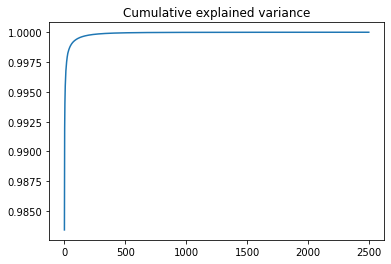

In [ ]:
(xr:=pandas.Series(pca.c_xplain_var_ratio)).plot(title='Cumulative explained variance')

In [12]:
k = 100 
pca.c_xplain_var_ratio.round(4)[:k].max()


0.9994

In [ ]:
#pca = PCA(int(X.shape[1]/4))   
#pca.fit(X)   #34s
#pca.explained_variance_ratio_.sum()

In [13]:
X = joblib.load(prodpath('fit_pca','projections',ext='.joblib')).proj(X,k)

In [ ]:
X.shape

(116250, 100)

In [ ]:
set(y)

{0, 1, 2, 3, 4}

In [14]:
X, X_val, y, y_val = train_test_split(X, y, test_size=0.5)

In [ ]:
X.shape, X_val.shape, y.shape, y_val.shape

((58125, 100), (58125, 100), (58125,), (58125,))

In [15]:
y          = to_dummies(y,5)
y_val      = to_dummies(y_val,5)

In [16]:
y.shape,y_val.shape

((58125, 5), (58125, 5))

In [ ]:
y

array([1, 2, 1, ..., 2, 0, 4])

In [ ]:
y2

0  1  2  3  4
0       0  1  0  0  0
1       0  0  1  0  0
2       0  1  0  0  0
3       0  0  1  0  0
4       0  1  0  0  0
...    .. .. .. .. ..
116245  0  0  0  0  1
116246  0  0  0  0  1
116247  0  0  1  0  0
116248  1  0  0  0  0
116249  0  0  0  0  1

[116250 rows x 5 columns]

## Visualizing fit data(3D)

In [ ]:
pca2 = MyPCA(X)
pca2

df =lambda k=3: pandas.DataFrame(
    pca2.proj(X,k)
    ).rename(columns='PC{}'.format).assign(label=y.values.argmax(axis=1),Type='train'
    ).append(
     pandas.DataFrame(
    pca2.proj(X_val,k)
    ).rename(columns='PC{}'.format).assign(label=y_val.values.argmax(axis=1),Type='val'
    )   
    ).assign(
        label2 = lambda D : D.label.map({v:k for k,v in MyRiceImgReader.all_species.items()})
    )

In [ ]:

df().pipe(lambda D :(
          D.iloc[:,:3].to_csv(prodpath('vectors','projections'),header=False,sep='\t',index=None),
          D[['label2']].to_csv(prodpath('meta','projections'),sep='\t',index=None)
          ))

<ipython-input-36-d00873cec32a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =lambda k=3: pandas.DataFrame(


(None, None)

In [ ]:
!ls output/2023-03-28/prod/projections/

meta.tsv  vectors.tsv


### species separation

In [ ]:
%%HTML
    
<iframe src="https://projector.tensorflow.org/?config=https://gist.githubusercontent.com/AbdourahmaneTintou/11cc1b18aa20cce3174f858e5c3bca3b/raw/cf6cb33912fd1dd62fddf42945fbdd67f34d0acd/config.json" style="width: 1500px; height: 900px;"></iframe>


In [ ]:
fig = px.scatter_3d(df(), x='PC0', y='PC1', z='PC2',
              color='label2',width=1000,height=800)
fig.update_traces(**{'marker':{'size': 3}})
fig.show()

### train vs validation

/tmp/ipykernel_151187/3126959195.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



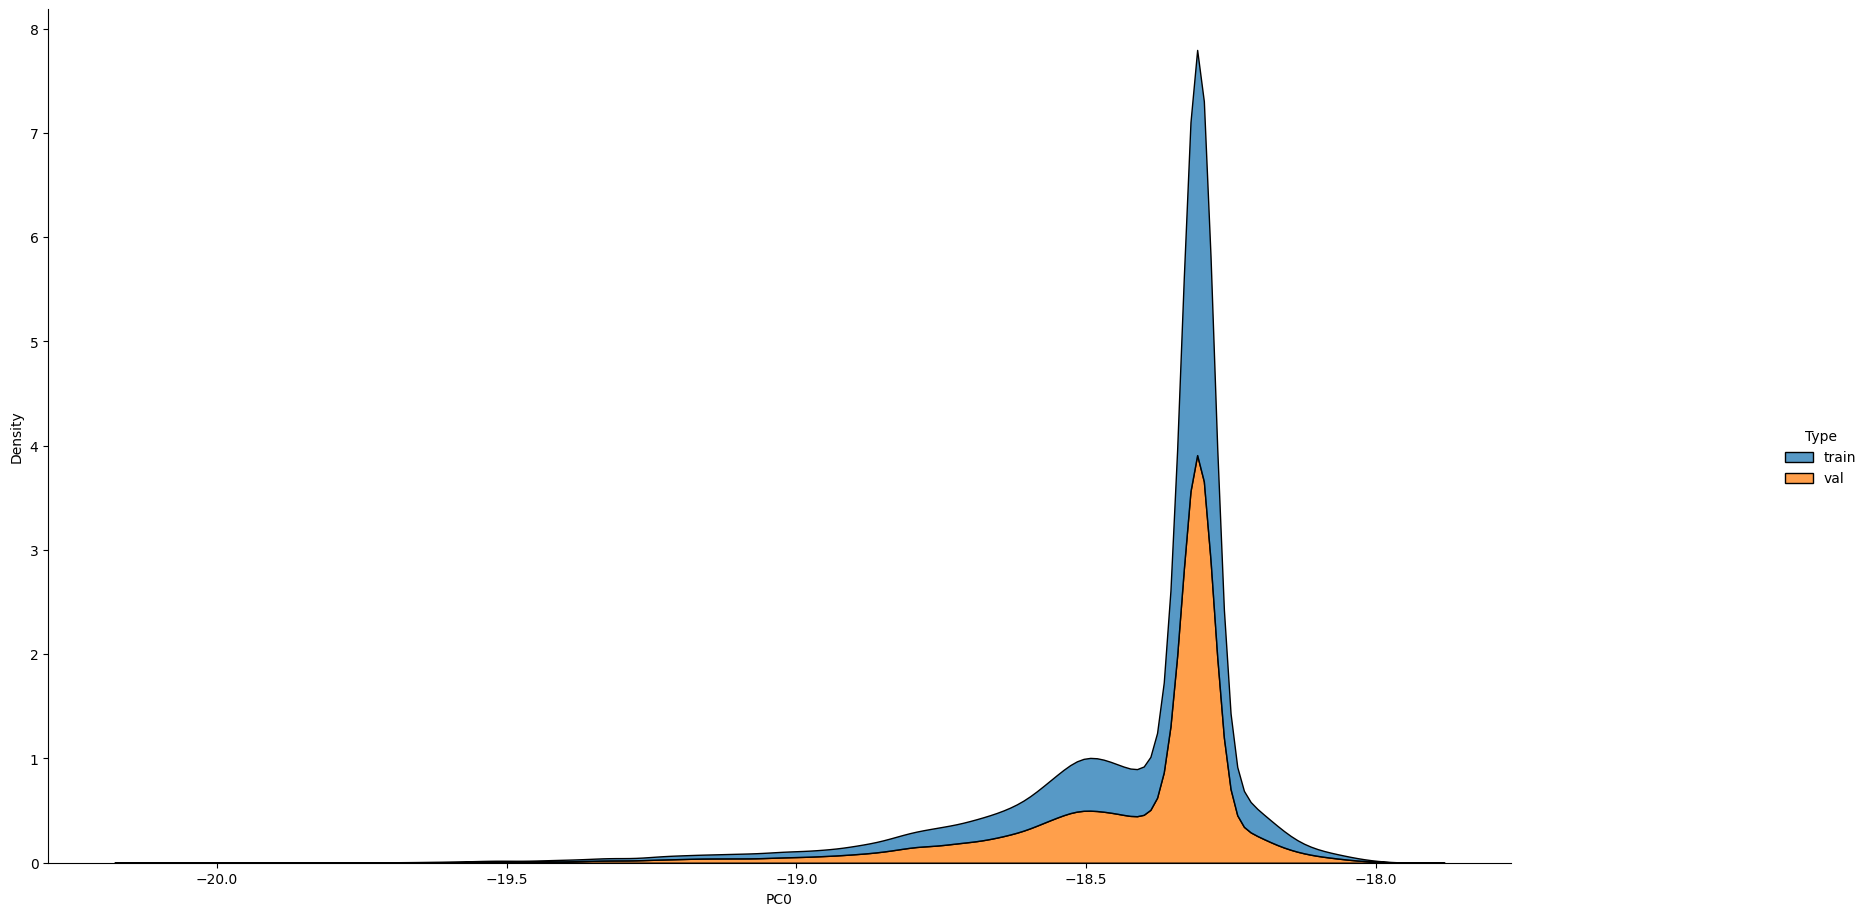

In [ ]:
fig = seaborn.displot(data=df(1).reset_index(drop=True), x="PC0", hue="Type", kind="kde", multiple="stack")
fig._figure.set_size_inches(20, 10)

# VII. Machine Learning

## Radom Forest (95.46% accuracy)

In [ ]:
Forest = RandomForestClassifier(random_state=42,min_samples_split=5,max_depth=None)
Forest.fit(X,y)
Forest

RandomForestClassifier(min_samples_split=5, random_state=42)

In [ ]:
(nok:=((Forest.predict(X_val) - y_val).sum(axis=1) == 0).sum())/len(y_val),nok,len(y_val)

(0.9546494623655915, 55489, 58125)

In [ ]:
Forest.predict(X_val).sum(axis=1).sum()

55489

In [ ]:
Forest_decision_weights =( 1 - abs((y_val - Forest.predict(X_val) ).sum())/len(y_val)).to_dict()
Forest_decision_weights

{0: 0.9918107526881721,
 1: 0.990141935483871,
 2: 0.9949591397849462,
 3: 0.990589247311828,
 4: 0.9871483870967742}

In [ ]:
joblib.dump(Forest, prodpath('Forest','fitted_models',ext='.joblib'))

['output/2023-03-28/prod/fitted_models/Forest.joblib']

In [ ]:
l=lambda :joblib.load(prodpath('Forest','fitted_models',ext='.joblib'))

(nok:=((l().predict(X_val) - y_val).sum(axis=1) == 0).sum())/len(y_val),nok,len(y_val)

(0.9546494623655915, 55489, 58125)

In [ ]:
l().predict(X_val)

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]])

## Logistic Regression(58.96% accuracy)

In [ ]:
Logistic = LogisticRegression(max_iter=10000)
Logistic.fit(X,y.values.argmax(axis=1))
Logistic

LogisticRegression(max_iter=10000)

In [ ]:
(nok:=(Logistic.predict(X_val) == y_val.values.argmax(axis=1)).sum())/len(y_val),nok,len(y_val)

(0.5849806451612903, 34002, 58125)

In [ ]:
Logistic_decision_weights =( 1 - abs((y_val - to_dummies(Logistic.predict(X_val),5) ).sum())/len(y_val)).to_dict()
Logistic_decision_weights

{0: 0.9578666666666666,
 1: 0.9512086021505376,
 2: 0.945341935483871,
 3: 0.9511397849462365,
 4: 0.9874064516129032}

In [ ]:
joblib.dump(Logistic,prodpath('Logistic','fitted_models',ext='.joblib'))

['output/2023-03-28/prod/fitted_models/Logistic.joblib']

# VIII. Deep Learning Approach

## MLP(97.14% accuracy)

In [18]:
import keras

In [19]:
_,*s =X.shape
Input   = keras.Input(shape=s,name='Input')
Dense0  = keras.layers.Dense(100, activation = 'relu',name='Hidden0')(Input)
Drop0   = keras.layers.Dropout(rate=.1,name='Dropout0')(Dense0)
Dense1  = keras.layers.Dense(50, activation = 'relu',name='Hidden1')(Drop0)
Output  = keras.layers.Dense(5,   activation = 'softmax',name = 'Output')(Dense1)


MLP    = keras.Model(Input, Output,name='MLPerceptron')
MLP.summary()

Model: "MLPerceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 100)]             0         
                                                                 
 Hidden0 (Dense)             (None, 100)               10100     
                                                                 
 Dropout0 (Dropout)          (None, 100)               0         
                                                                 
 Hidden1 (Dense)             (None, 50)                5050      
                                                                 
 Output (Dense)              (None, 5)                 255       
                                                                 
Total params: 15,405
Trainable params: 15,405
Non-trainable params: 0
_________________________________________________________________


In [20]:
batch_size,\
      epochs= 100,150

loss,metrics = 'categorical_crossentropy',['accuracy']


MLP.compile(loss=loss, optimizer='adam', metrics=metrics)

history      = MLP.fit(
                        X, y, 
                        batch_size=batch_size, epochs=epochs,
                        verbose=1,validation_data=(X_val, y_val)
                        )

Epoch 1/150
582/582 [==============================] - 9s 6ms/step - loss: 1.1328 - accuracy: 0.4964 - val_loss: 0.8535 - val_accuracy: 0.5876
Epoch 2/150
582/582 [==============================] - 5s 8ms/step - loss: 0.8515 - accuracy: 0.5871 - val_loss: 0.8344 - val_accuracy: 0.5933
Epoch 3/150
582/582 [==============================] - 3s 5ms/step - loss: 0.8341 - accuracy: 0.5984 - val_loss: 0.8281 - val_accuracy: 0.5953
Epoch 4/150
582/582 [==============================] - 3s 5ms/step - loss: 0.8232 - accuracy: 0.6166 - val_loss: 0.8091 - val_accuracy: 0.6673
Epoch 5/150
582/582 [==============================] - 3s 6ms/step - loss: 0.8000 - accuracy: 0.6519 - val_loss: 0.7772 - val_accuracy: 0.7006
Epoch 6/150
582/582 [==============================] - 5s 9ms/step - loss: 0.7632 - accuracy: 0.6918 - val_loss: 0.7331 - val_accuracy: 0.7990
Epoch 7/150
582/582 [==============================] - 3s 5ms/step - loss: 0.7239 - accuracy: 0.7236 - val_loss: 0.6933 - val_accuracy: 0.7439

<Axes: >

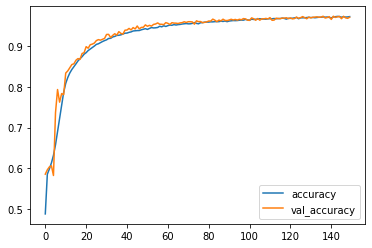

In [ ]:
pandas.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

<Axes: >

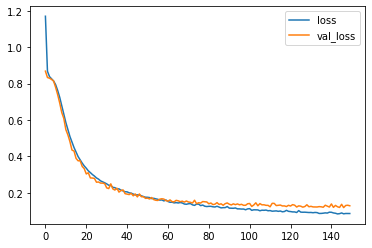

In [ ]:
pandas.DataFrame(history.history)[['loss','val_loss']].plot()

In [21]:
MLP.save(prodpath('MLP','fitted_models',ext=''))

## Convolution

In [24]:
%cd data

/content/drive/MyDrive/PY4BD/Rice/data


In [25]:

rootpath = 'output/2023-03-28'
n_components = 10
GrayStreamer = BatchStream(
                    arrpath('gray','X'),
                    arrpath('gray','y'),
                        inverters_zip=f'{rootpath}/inverters.zip',
                         parent=f'{rootpath}/inverters/gray',
                         max_dim  = n_components,
                          imshape = (250,250,1),
                        n_chunks  = 100,
                          as_im   = True,
                            gs    = True)
GrayEnlargedStreamer = BatchStream(
                    arrpath('gray_enlarged','X'),
                    arrpath('gray_enlarged','y'),
                     inverters_zip=f'{rootpath}/inverters.zip',
                         parent=f'{rootpath}/inverters/gray_enlarged',
                         max_dim  = n_components,
                          imshape = (250,250,1),
                        n_chunks  = 100,
                          as_im   = True,
                            gs    = True)
GrayEnlargedPileStreamer = BatchStream(
                    arrpath('gray_enlarged_pile','X'),
                    arrpath('gray_enlarged_pile','y'),
                     inverters_zip=f'{rootpath}/inverters.zip',
                         parent=f'{rootpath}/inverters/gray_enlarged',
                         max_dim  = n_components,
                          imshape = (250,250,1),
                        n_chunks  = 100,
                          as_im   = True,
                            gs    = True)

EOFError: ignored

In [ ]:
print(f'images : {GrayEnlargedStreamer.X.shape[0]}\nchunks : {len(GrayEnlargedStreamer)}')

images : 56250
chunks : 100


In [ ]:
print(f'images : {GrayStreamer.X.shape[0]}\nchunks : {len(GrayStreamer)}')

images : 56250
chunks : 100


In [ ]:
print(f'images : {GrayEnlargedPileStreamer.X.shape[0]}\nchunks : {len(GrayEnlargedPileStreamer)}')

images : 3750
chunks : 100


### Limit chunks(using free plan)

In [ ]:
limit = 20 
GrayEnlargedStreamer.idx     = GrayEnlargedStreamer.idx[:limit]
GrayEnlargedPileStreamer.idx = GrayEnlargedPileStreamer.idx[:limit]
GrayStreamer.idx             = GrayStreamer.idx[:limit]
print(f'chunks : {len(GrayEnlargedStreamer)}')
print(f'chunks : {len(GrayStreamer)}')
print(f'chunks : {len(GrayEnlargedPileStreamer)}')

In [ ]:
for X,y in GrayStreamer:
  ...
  break

0: 0it [00:00, ?it/s]

In [ ]:
X.shape

(563, 250, 250, 1)

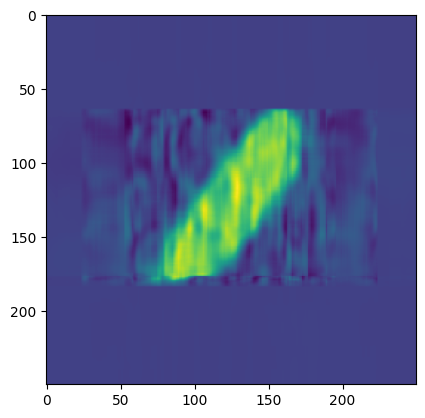

In [ ]:
plt.imshow(X[0])

In [ ]:
MyRiceImgReader.all_species

{'Karacadag': 0, 'Jasmine': 1, 'Ipsala': 2, 'Arborio': 3, 'Basmati': 4}

In [ ]:
y[0]

1

0: 0it [00:00, ?it/s]

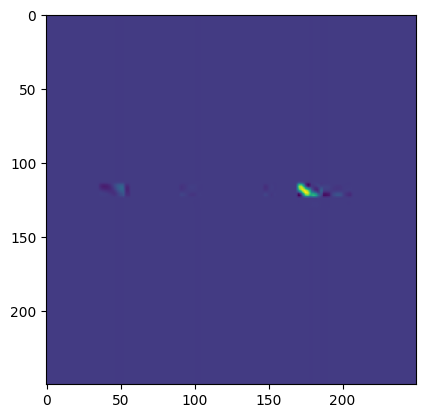

In [ ]:
for X,y in GrayEnlargedStreamer:
  ...
  break
plt.imshow(X[6])

0: 0it [00:00, ?it/s]

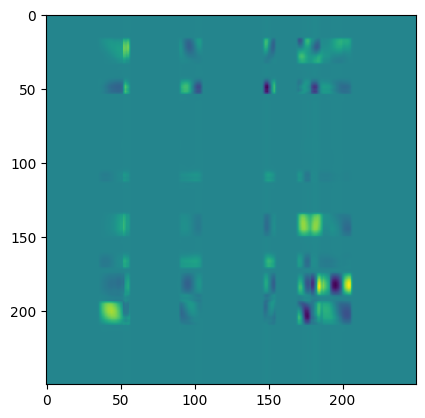

In [ ]:
for X,y in GrayEnlargedPileStreamer:
  ...
  break
plt.imshow(X[6])

In [ ]:
Input   = keras.layers.Input(shape=(250,250,1),name='Input') 

clayer0 = keras.layers.Convolution2D(25, kernel_size = 5, activation='relu',name='conv0' )(Input) 
clayer1 = keras.layers.Convolution2D(50, kernel_size = 5, activation='relu',name='conv1' )(clayer0) 
clayer2 = keras.layers.MaxPooling2D((5, 5),name='MaxPool0')(clayer1) 
clayer3 = keras.layers.Flatten(name='Flatten')(clayer2) 


Dense0  = keras.layers.Dense(75, activation = 'relu',name='Dense0')(clayer3)
Drop0   = keras.layers.Dropout(rate=.2,name='Dropout0')(Dense0)
Dense1  = keras.layers.Dense(50, activation = 'relu',name='Dense1')(Drop0)
Output  = keras.layers.Dense(5,   activation = 'softmax',name = 'Output')(Dense1)


Conv    = keras.Model(Input, Output,name='Convolution')
Conv.summary()

In [ ]:
loss,metrics = 'categorical_crossentropy',['accuracy']
Conv.compile(loss=loss, optimizer='adam', metrics=metrics)

In [ ]:
histories = []
for (X,y),(Xe,ye),(Xep,yep) in zip(GrayStreamer,
                                   GrayEnlargedStreamer,
                                   GrayEnlargedPileStreamer) :
  
  X,y = numpy.concatenate([

              X,Xe,Xep

          ],axis=0),numpy.concatenate([
              
              y,ye,yep
          ],axis=0)
  del Xe,ye,Xep,yep

  epochs= 5


  X_train, X_val, y_train, y_val = train_test_split(X, to_dummies(y,5), test_size=0.5)


  

  history      = Conv.fit(
                          X_train, y_train, epochs=epochs,
                          verbose=1,validation_data=(X_val, y_val)
                          )
  histories.append(history)


In [ ]:
Conv.save(prodpath('Conv','fitted_models',ext=''))

In [ ]:
del X,y

In [ ]:
history.history

{'loss': [0.0, 0.0, 0.0, 0.0, 0.0],
 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [ ]:
histories = [history.history for history in histories ]

In [ ]:
len(histories)

98

<Axes: >

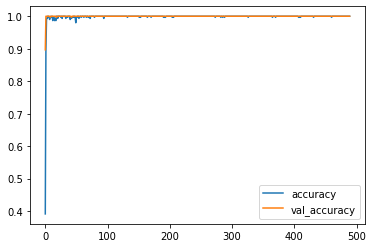

In [ ]:
pandas.DataFrame(histories).apply(lambda c : sum(c,[]))[['accuracy','val_accuracy']].plot()

<Axes: >

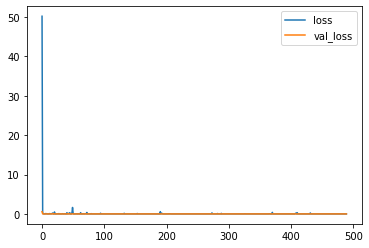

In [ ]:
pandas.DataFrame(histories).apply(lambda c : sum(c,[]))[['loss','val_loss']].plot()

In [ ]:
keras.Model.load_weights(Conv,'output/Conv.model')

# IX. Evaluation

In [ ]:
X_test,y_test     = numpy.load(open(arrpath('gray','X_test'),'rb')),\
            numpy.load(open(arrpath('gray','y_test'),'rb'))
X_test,y_test     = numpy.concatenate([X_test,numpy.load(open(arrpath('gray_enlarged','X_test'),'rb'))]),\
            numpy.concatenate([y_test,numpy.load(open(arrpath('gray_enlarged','y_test'),'rb'))])
X_test,y_test     = numpy.concatenate([X_test,numpy.load(open(arrpath('gray_enlarged_pile','X_test'),'rb'))]),\
            numpy.concatenate([y_test,numpy.load(open(arrpath('gray_enlarged_pile','y_test'),'rb'))])
#scaling data
k = 100
m,M     = -1474.5641, 2537.4983
X_test -=m
X_test/=(M-m)

In [ ]:
X_test.min(),X_test.max()

(0.0008300760153003402, 0.99399609137809)

In [ ]:
X_test = joblib.load(prodpath('fit_pca','projections',ext='.joblib')).proj(X_test,k)

In [ ]:
X_test.shape

(38750, 100)

In [ ]:
final_estimations = {
    'RadmonForest'      : joblib.load(prodpath('Forest','fitted_models',ext='.joblib')).predict(X_test).argmax(axis=1),
    'LogisticRegression': joblib.load(prodpath('Logistic','fitted_models',ext='.joblib')).predict(X_test)
    }

In [ ]:
final_estimations = pandas.DataFrame(final_estimations)
final_estimations

RadmonForest  LogisticRegression
0                 0                   0
1                 1                   1
2                 2                   2
3                 0                   0
4                 3                   3
...             ...                 ...
38745             0                   0
38746             4                   2
38747             0                   4
38748             0                   1
38749             0                   3

[38750 rows x 2 columns]

In [ ]:
(final_estimations.apply(lambda c : c == y_test).sum()/len(y_test)).sort_values()

LogisticRegression    0.585652
RadmonForest          0.960439
dtype: float64

In [ ]:
MystreamerTest = Stream(
                    'output/X_test.npy',
                    'output/y_test.npy',
                         max_dim  = 7,
                          imshape = (250,250,1),
                        n_chunks  = 100,
                          as_im   = True,
                     grayscale    = True)

In [ ]:
print(f'images : {MystreamerTest.X.shape[0]}\nchunks : {len(MystreamerTest)}')

images : 15000
chunks : 100


In [ ]:
estims  = []

for X_test,_ in MystreamerTest:
  estims.append(Conv.predict(X_test))
  ...

0: 150it [00:00, 941.36it/s]


5/5 [==============================] - 0s 31ms/step


1: 150it [00:00, 481.87it/s]


5/5 [==============================] - 0s 32ms/step


2: 150it [00:00, 787.27it/s]


5/5 [==============================] - 0s 31ms/step


3: 150it [00:00, 699.64it/s]


5/5 [==============================] - 0s 28ms/step


4: 150it [00:00, 611.93it/s]


5/5 [==============================] - 0s 24ms/step


5: 150it [00:00, 739.23it/s]


5/5 [==============================] - 0s 32ms/step


6: 150it [00:00, 797.58it/s]


5/5 [==============================] - 0s 31ms/step


7: 150it [00:00, 807.12it/s]


5/5 [==============================] - 0s 29ms/step


8: 150it [00:00, 550.45it/s]


5/5 [==============================] - 0s 32ms/step


9: 150it [00:00, 621.23it/s]


5/5 [==============================] - 0s 25ms/step


10: 150it [00:00, 833.16it/s]


5/5 [==============================] - 0s 24ms/step


11: 150it [00:00, 976.89it/s] 


5/5 [==============================] - 0s 23ms/step


12: 150it [00:00, 751.79it/s]


5/5 [==============================] - 0s 24ms/step


13: 150it [00:00, 768.34it/s]


5/5 [==============================] - 0s 25ms/step


14: 150it [00:00, 818.31it/s]


5/5 [==============================] - 0s 32ms/step


15: 150it [00:00, 921.03it/s]


5/5 [==============================] - 0s 30ms/step


16: 150it [00:00, 912.40it/s]


5/5 [==============================] - 0s 24ms/step


17: 150it [00:00, 779.71it/s]


5/5 [==============================] - 0s 30ms/step


18: 150it [00:00, 435.54it/s]


5/5 [==============================] - 0s 23ms/step


19: 150it [00:00, 575.89it/s]


5/5 [==============================] - 0s 25ms/step


20: 150it [00:00, 496.69it/s]


5/5 [==============================] - 0s 26ms/step


21: 150it [00:00, 871.39it/s]


5/5 [==============================] - 0s 24ms/step


22: 150it [00:00, 885.80it/s]


5/5 [==============================] - 0s 23ms/step


23: 150it [00:00, 1619.74it/s]


5/5 [==============================] - 0s 23ms/step


24: 150it [00:00, 1815.42it/s]


5/5 [==============================] - 0s 23ms/step


25: 150it [00:00, 1882.39it/s]


5/5 [==============================] - 0s 23ms/step


26: 150it [00:00, 1671.47it/s]


5/5 [==============================] - 0s 23ms/step


27: 150it [00:00, 1802.50it/s]


5/5 [==============================] - 0s 23ms/step


28: 150it [00:00, 1621.25it/s]


5/5 [==============================] - 0s 23ms/step


29: 150it [00:00, 1888.90it/s]


5/5 [==============================] - 0s 23ms/step


30: 150it [00:00, 1531.01it/s]


5/5 [==============================] - 0s 23ms/step


31: 150it [00:00, 1941.38it/s]


5/5 [==============================] - 0s 23ms/step


32: 150it [00:00, 1262.74it/s]


5/5 [==============================] - 0s 23ms/step


33: 150it [00:00, 876.12it/s]


5/5 [==============================] - 0s 24ms/step


34: 150it [00:00, 653.27it/s]


5/5 [==============================] - 0s 23ms/step


35: 150it [00:00, 730.80it/s]


5/5 [==============================] - 0s 26ms/step


36: 150it [00:00, 1826.32it/s]


5/5 [==============================] - 0s 29ms/step


37: 150it [00:00, 1291.47it/s]


5/5 [==============================] - 0s 32ms/step


38: 150it [00:00, 1700.62it/s]


5/5 [==============================] - 0s 30ms/step


39: 150it [00:00, 1807.12it/s]


5/5 [==============================] - 0s 26ms/step


40: 150it [00:00, 1865.62it/s]


5/5 [==============================] - 0s 25ms/step


41: 150it [00:00, 1719.75it/s]


5/5 [==============================] - 0s 23ms/step


42: 150it [00:00, 1668.95it/s]


5/5 [==============================] - 0s 24ms/step


43: 150it [00:00, 1722.32it/s]


5/5 [==============================] - 0s 24ms/step


44: 150it [00:00, 1708.19it/s]


5/5 [==============================] - 0s 24ms/step


45: 150it [00:00, 1676.23it/s]


5/5 [==============================] - 0s 24ms/step


46: 150it [00:00, 1909.01it/s]


5/5 [==============================] - 0s 24ms/step


47: 150it [00:00, 1785.44it/s]


5/5 [==============================] - 0s 24ms/step


48: 150it [00:00, 1670.31it/s]


5/5 [==============================] - 0s 24ms/step


49: 150it [00:00, 921.97it/s]


5/5 [==============================] - 0s 24ms/step


50: 150it [00:00, 851.53it/s]


5/5 [==============================] - 0s 24ms/step


51: 150it [00:00, 897.73it/s]


5/5 [==============================] - 0s 24ms/step


52: 150it [00:00, 1499.51it/s]


5/5 [==============================] - 0s 24ms/step


53: 150it [00:00, 1860.26it/s]


5/5 [==============================] - 0s 24ms/step


54: 150it [00:00, 1873.25it/s]


5/5 [==============================] - 0s 23ms/step


55: 150it [00:00, 1671.43it/s]


5/5 [==============================] - 0s 23ms/step


56: 150it [00:00, 1540.75it/s]


5/5 [==============================] - 0s 23ms/step


57: 150it [00:00, 1934.77it/s]


5/5 [==============================] - 0s 24ms/step


58: 150it [00:00, 1504.39it/s]


5/5 [==============================] - 0s 24ms/step


59: 150it [00:00, 1905.55it/s]


5/5 [==============================] - 0s 24ms/step


60: 150it [00:00, 1825.37it/s]


5/5 [==============================] - 0s 23ms/step


61: 150it [00:00, 1895.57it/s]


5/5 [==============================] - 0s 24ms/step


62: 150it [00:00, 1876.42it/s]


5/5 [==============================] - 0s 24ms/step


63: 150it [00:00, 1472.19it/s]


5/5 [==============================] - 0s 25ms/step


64: 150it [00:00, 1721.54it/s]


5/5 [==============================] - 0s 23ms/step


65: 150it [00:00, 1333.00it/s]


5/5 [==============================] - 0s 24ms/step


66: 150it [00:00, 800.76it/s]


5/5 [==============================] - 0s 24ms/step


67: 150it [00:00, 829.16it/s]


5/5 [==============================] - 0s 24ms/step


68: 150it [00:00, 858.59it/s]


5/5 [==============================] - 0s 24ms/step


69: 150it [00:00, 1773.47it/s]


5/5 [==============================] - 0s 27ms/step


70: 150it [00:00, 1699.36it/s]


5/5 [==============================] - 0s 23ms/step


71: 150it [00:00, 1683.61it/s]


5/5 [==============================] - 0s 24ms/step


72: 150it [00:00, 1905.19it/s]


5/5 [==============================] - 0s 24ms/step


73: 150it [00:00, 1388.44it/s]


5/5 [==============================] - 0s 24ms/step


74: 150it [00:00, 1857.63it/s]


5/5 [==============================] - 0s 24ms/step


75: 150it [00:00, 1830.59it/s]


5/5 [==============================] - 0s 24ms/step


76: 150it [00:00, 1817.79it/s]


5/5 [==============================] - 0s 23ms/step


77: 150it [00:00, 1385.14it/s]


5/5 [==============================] - 0s 25ms/step


78: 150it [00:00, 1179.15it/s]


5/5 [==============================] - 0s 24ms/step


79: 150it [00:00, 1931.71it/s]


5/5 [==============================] - 0s 24ms/step


80: 150it [00:00, 1820.40it/s]


5/5 [==============================] - 0s 24ms/step


81: 150it [00:00, 1697.19it/s]


5/5 [==============================] - 0s 24ms/step


82: 150it [00:00, 841.31it/s]


5/5 [==============================] - 0s 24ms/step


83: 150it [00:00, 838.27it/s]


5/5 [==============================] - 0s 23ms/step


84: 150it [00:00, 827.74it/s]


5/5 [==============================] - 0s 26ms/step


85: 150it [00:00, 1811.87it/s]


5/5 [==============================] - 0s 24ms/step


86: 150it [00:00, 1729.58it/s]


5/5 [==============================] - 0s 24ms/step


87: 150it [00:00, 2009.25it/s]


5/5 [==============================] - 0s 24ms/step


88: 150it [00:00, 1659.17it/s]


5/5 [==============================] - 0s 24ms/step


89: 150it [00:00, 1794.03it/s]


5/5 [==============================] - 0s 24ms/step


90: 150it [00:00, 1298.65it/s]


5/5 [==============================] - 0s 24ms/step


91: 150it [00:00, 1653.52it/s]


5/5 [==============================] - 0s 23ms/step


92: 150it [00:00, 1881.44it/s]


5/5 [==============================] - 0s 24ms/step


93: 150it [00:00, 1574.06it/s]


5/5 [==============================] - 0s 24ms/step


94: 150it [00:00, 1885.55it/s]


5/5 [==============================] - 0s 24ms/step


95: 150it [00:00, 1626.41it/s]


5/5 [==============================] - 0s 24ms/step


96: 150it [00:00, 1576.58it/s]


5/5 [==============================] - 0s 24ms/step


97: 150it [00:00, 1403.34it/s]


5/5 [==============================] - 0s 24ms/step


98: 150it [00:00, 1346.69it/s]


5/5 [==============================] - 0s 23ms/step


99: 150it [00:00, 829.39it/s]


5/5 [==============================] - 0s 24ms/step


In [ ]:
estims = numpy.concatenate(estims)
estims.shape

(15000, 5)

In [ ]:
#numpy.save(open('conv_estims.npy','wb'),estims)
estims = numpy.load(open('output/conv_estims.npy','rb'))
estims.shape

(15000, 5)

In [ ]:
final_estimations = {
    'RadmonForest'      : Forest.predict(X_test).argmax(axis=1),
    'LogisticRegression': Logistic.predict(X_test),
    'MLP'               : MLP.predict(X_test).argmax(axis=1),
    'ConvNet'           : estims.argmax(axis=1)
    }

469/469 [==============================] - 1s 1ms/step


In [ ]:
final_estimations = pandas.DataFrame(final_estimations)
final_estimations

RadmonForest  LogisticRegression  MLP  ConvNet
0                 0                   0    0        0
1                 4                   4    4        4
2                 3                   3    3        3
3                 2                   2    2        2
4                 1                   1    1        1
...             ...                 ...  ...      ...
14995             2                   2    2        2
14996             3                   3    3        3
14997             2                   2    2        2
14998             1                   1    1        1
14999             4                   4    4        4

[15000 rows x 4 columns]

<Axes: title={'center': 'Misclassifications'}>

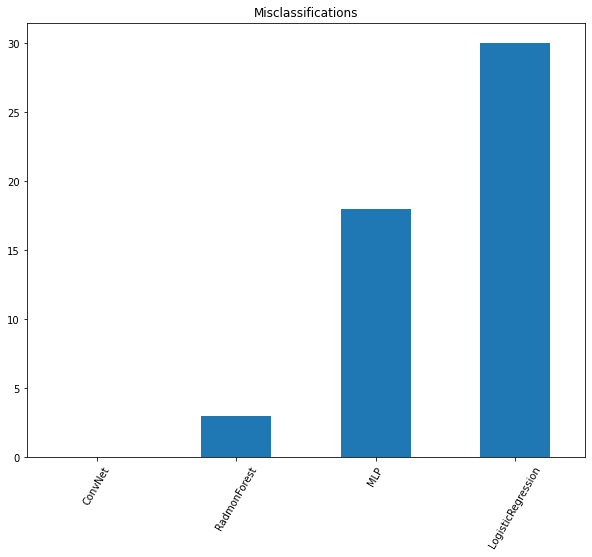

In [ ]:
final_estimations.apply(lambda c : c != y_test).sum().sort_values().plot(kind='bar',rot=60,figsize=(10,8),title='Misclassifications')

['output/Forest.joblib']

In [ ]:
joblib.load('output/Forest.joblib').predict(X_test)

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]])

# X. Grains from pile

In [ ]:
class RicePile:
  """
  Extracts significant
  Rice grains from pile
  """
  def __init__(self,
               image_path : str,
               size       : tuple =(250,250)):
    self.im = Image.open(image_path)
    if size :
      self.im = self.im.resize(size)
    self.im_gs = numpy.array([row.mean(axis=1) for row in numpy.array(self.im)])
  def degrated_im(self,im,n):
      im = im.copy()
      im[im<n]=0
      return im  
  def plot_degradated(self,
                      axes=(4,5),
                      plot_inches=(14,12),
                      min_pixel_value = 200):
    fig,axes    = plt.subplots(*axes)
    fig.set_size_inches(*plot_inches)
    n=min_pixel_value
    for i,ax in enumerate(axes.ravel()) :
      ax.axes.axis('off')
      ax.set_title(f'n={n}')
      ax.imshow(self.degrated_im(self.im_gs,n))  
      n+=2 
  def connected_components(self,
                           min_pixel_value):
    im = self.degrated_im(self.im_gs,
                          min_pixel_value)
    ixmat = numpy.array(range(im.shape[0]*im.shape[1])).reshape(*im.shape)
    ixmat[im==0] = -1
    net = numpy.concatenate([
            ixmat[:,c:c+2]
            
            for c in range(ixmat.shape[1]-1)
            
          ]+[
              ixmat[l:l+2,:].T
              for l in range(ixmat.shape[0]-1)
            
        ])

    net = net[~(net==-1).max(axis=1)]
    
    G = nx.Graph()

    G.add_edges_from(net)

    return nx.connected_components(G),ixmat
  def component_image(self,c,ixmat):
    im_mat       = numpy.array(self.im)
    shape        = dict(zip(range(3),im_mat.shape))
    shape[2]     = shape.get(2,1)
    im           = im_mat.reshape(*shape.values()) #250x250x3
    idxs         = numpy.isin(ixmat,c).reshape([*ixmat.shape[:2]]+[1])#250*250*1
    for i in range(len(im)) :
      mask = numpy.concatenate([idxs[i] for _ in range(list(shape.values())[-1])],axis=1)
      im[i][~mask] = 0
    return im

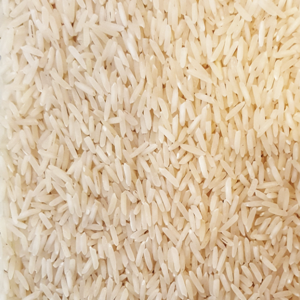

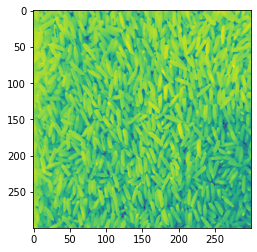

In [ ]:
mypile = RicePile('piles/tas_riz_basmati.PNG',size=(300,300))
plt.imshow(mypile.im_gs)
mypile.im

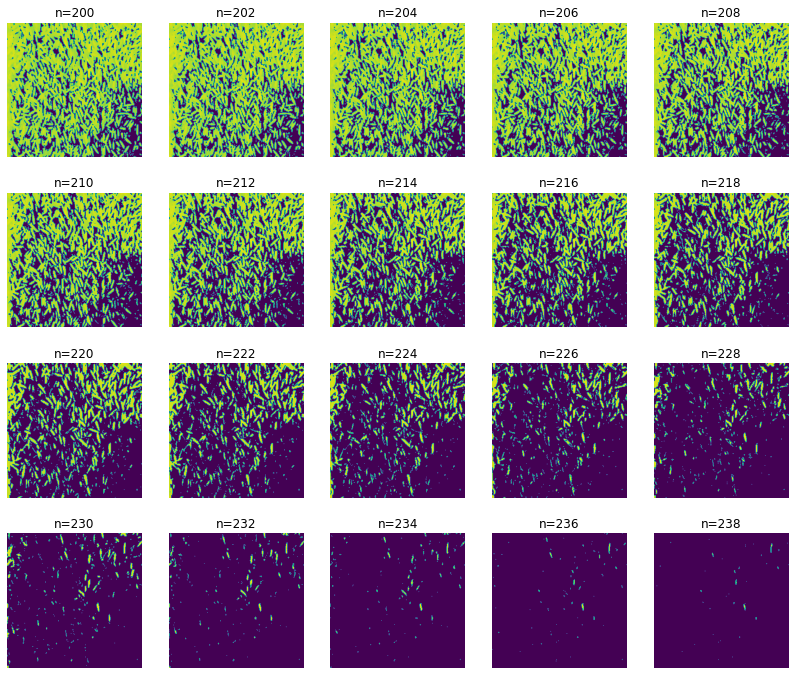

In [ ]:
mypile.plot_degradated(min_pixel_value=200)

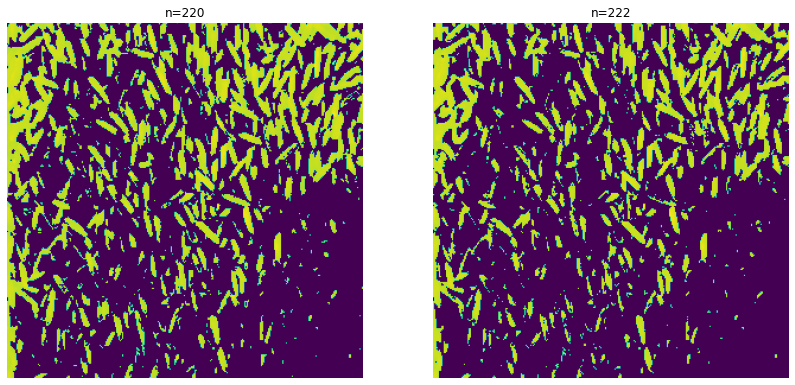

In [ ]:
mypile.plot_degradated(axes=(1,2), plot_inches=(14, 12), min_pixel_value=220)

(count    402.000000
 mean       2.542578
 std        1.593436
 min        0.693147
 25%        1.098612
 50%        2.197225
 75%        3.778442
 max        8.179480
 dtype: float64,
 <Axes: title={'center': 'Log10 components diameters'}, ylabel='Frequency'>)

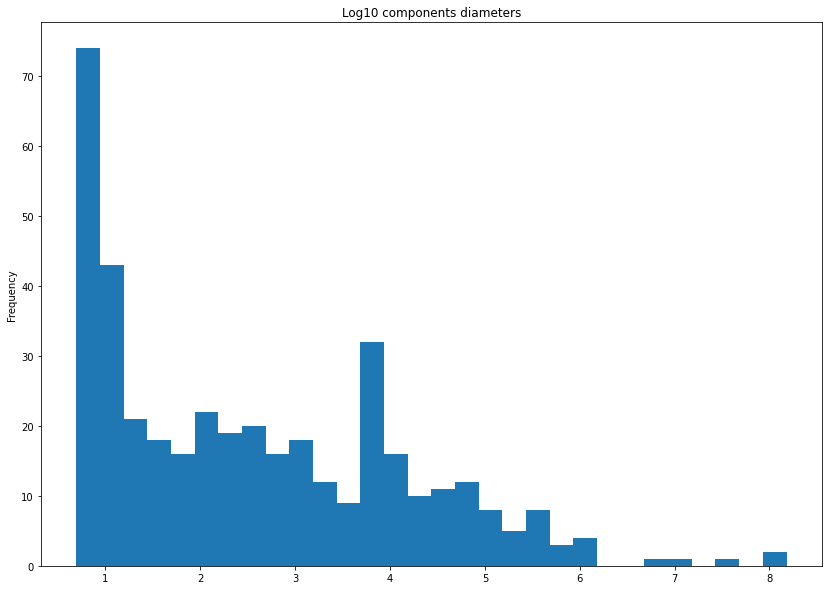

In [ ]:
cc,mat = mypile.connected_components(min_pixel_value=220)

numpy.log((S:=pandas.Series(
    
    [*cc]

)).map(len)).pipe(lambda S :( S.describe(),S.plot(kind='hist',title='Log10 components diameters',figsize=(14,10),bins=30)))

In [ ]:
cc=S.pipe(
        
          lambda S : S.loc[S.map(len).sort_values().index][(
                          numpy.log(S.map(len)) > 4
                       ) & (
                          
                          numpy.log(S.map(len)) < 6
                       )
                      ]
          
          ).values.tolist()
del S

In [ ]:
len(cc)

71

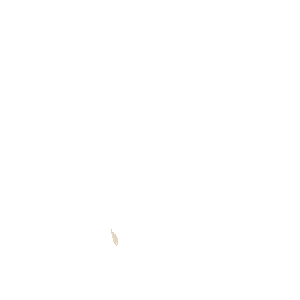

In [ ]:
Image.fromarray(mypile.component_image(list(cc[3]),mat))